In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_classification

In [226]:
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)
## We can decrese value of n_clusters_per_class as 1 if we want data points clearly seperable.

In [228]:
X

array([[-0.80283218,  1.57705909],
       [ 1.10901519, -1.25851954],
       [-0.2958383 ,  0.9037372 ],
       ...,
       [-1.56592153, -0.7602701 ],
       [ 1.0801063 ,  0.59474959],
       [-0.08523794, -1.41915915]])

In [230]:
y

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [232]:
pd.DataFrame(X)

,0,1
0,-0.802832,1.577059
1,1.109015,-1.258520
2,-0.295838,0.903737
3,0.940781,0.950351
4,0.988664,-1.069731
...,...,...
995,-1.750784,-0.649145
996,-0.413396,1.060260
997,-1.565922,-0.760270
998,1.080106,0.594750


<Axes: xlabel='0', ylabel='1'>

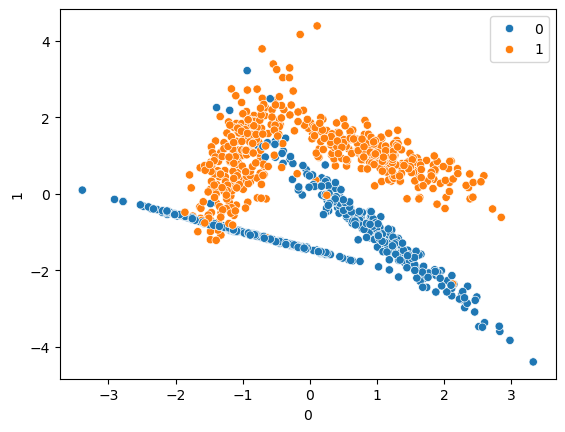

In [234]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [238]:
from sklearn.svm import SVC

In [240]:
svc = SVC(kernel='linear')

In [242]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [244]:
## Prediction
y_pred = svc.predict(X_test)

In [246]:
from sklearn.metrics import classification_report, confusion_matrix

In [248]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       116
           1       0.94      0.87      0.90       134

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250

[[108   8]
 [ 17 117]]


In [250]:
## Try with different kernel (RBF).
rbf = SVC(kernel='rbf')

In [252]:
rbf.fit(X_train, y_train)

SVC()

In [254]:
## Prediction
y_pred1 = rbf.predict(X_test)

In [256]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       116
           1       0.99      0.93      0.96       134

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [260]:
## Try with different kernel (Polynomial).
poly = SVC(kernel='poly')
poly.fit(X_train, y_train)
y_pred2 = poly.predict(X_test)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       116
           1       0.91      0.88      0.89       134

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250

[[104  12]
 [ 16 118]]


In [262]:
## Try with different kernel (Sigmoid).
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred3 = sigmoid.predict(X_test)
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       116
           1       0.85      0.83      0.84       134

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 97  19]
 [ 23 111]]


## Hyperparameter Tuning with SVC

In [264]:
## Hyperparameter Tuning.
from sklearn.model_selection import GridSearchCV

## Defining parameter range
param_grid = { 'C' : [0.1, 1, 10, 100, 1000],
                'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
                 'kernel' : ['rbf']}

In [266]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [268]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.947 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.927 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [274]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [276]:
## Prediction
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       116
           1       0.99      0.93      0.96       134

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

[[115   1]
 [ 10 124]]
